<a href="https://colab.research.google.com/github/bedhinesh/capstone-aiml/blob/rohan/Capstone_FastAI__vgg19_bn_noAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import torch
print('pytorch version: ',torch.__version__)
import torch.utils.data as data
import fastai
print('fastai version: ',fastai.__version__)
import torchvision.models
import warnings; warnings.filterwarnings('ignore')

pytorch version:  1.8.0+cu101
fastai version:  1.0.61


In [ ]:
img_dir = '/content/drive/MyDrive/CapstoneProject/Data/car_data'
path = Path(img_dir)
path.ls()

[PosixPath('/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data')]

In [ ]:
data = ImageDataBunch.from_folder(f'{path}',valid_pct = 0.2,size = 224,bs = 64).normalize(imagenet_stats)

In [ ]:
for classes, numbers in enumerate(data.classes[:15]):
    print(classes,':',numbers)
len(data.classes),data.c

0 : AM General Hummer SUV 2000
1 : Acura Integra Type R 2001
2 : Acura RL Sedan 2012
3 : Acura TL Sedan 2012
4 : Acura TL Type-S 2008
5 : Acura TSX Sedan 2012
6 : Acura ZDX Hatchback 2012
7 : Aston Martin V8 Vantage Convertible 2012
8 : Aston Martin V8 Vantage Coupe 2012
9 : Aston Martin Virage Convertible 2012
10 : Aston Martin Virage Coupe 2012
11 : Audi 100 Sedan 1994
12 : Audi 100 Wagon 1994
13 : Audi A5 Coupe 2012
14 : Audi R8 Coupe 2012


(196, 196)

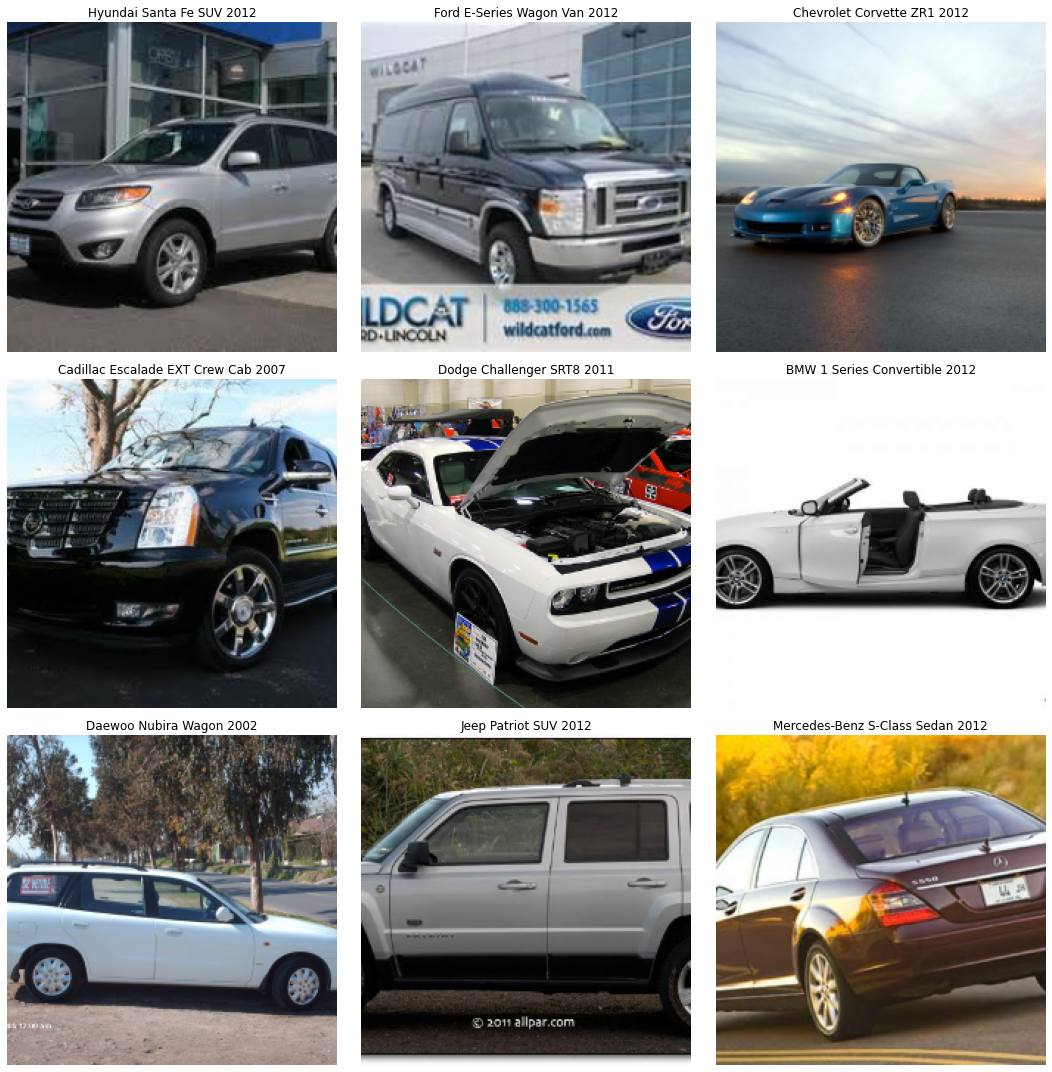

In [ ]:
data.show_batch(rows = 3,figsize = (15,15))

In [ ]:

learn = cnn_learner(data, models.densenet121, metrics=error_rate, model_dir="/content/drive/MyDrive/CapstoneProject/tmp/model/")

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [ ]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,4.842726,3.218068,0.727525,32:44
1,2.581904,1.811919,0.473896,05:55
2,1.507017,1.331691,0.348471,06:22
3,0.912256,1.092488,0.295953,06:09
4,0.515928,1.002312,0.274946,06:14
5,0.342590,0.973982,0.267532,06:08


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.569680,1.066345,0.291628,06:08
1,1.192466,1.232672,0.325610,06:13
2,0.729937,0.932964,0.252085,06:22
3,0.367257,0.621450,0.164041,06:20
4,0.134221,0.530138,0.138400,06:25
5,0.062838,0.505701,0.133457,06:18


In [ ]:
learn.save('stage-2',return_path=True)

PosixPath('/content/drive/MyDrive/CapstoneProject/tmp/model/stage-2.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

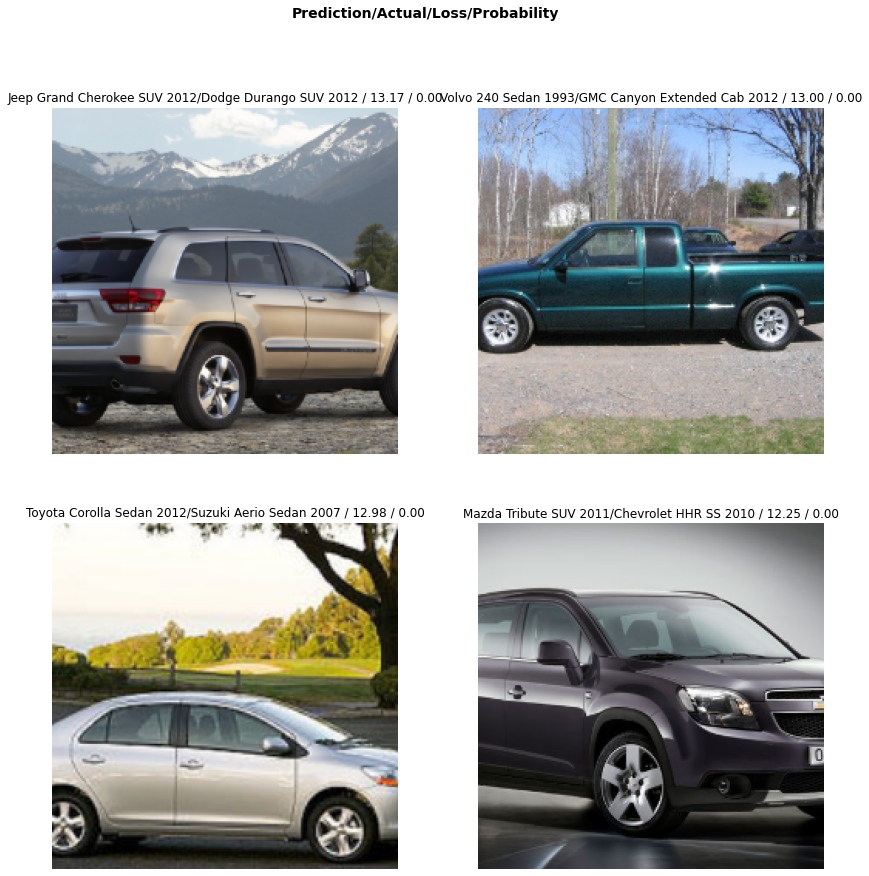

In [ ]:
interp.plot_top_losses(4, figsize=(14,14),heatmap=False)

In [ ]:
interp.most_confused(min_val=2)

[('Chevrolet Silverado 1500 Extended Cab 2012',
  'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  10),
 ('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 8),
 ('Chevrolet Express Cargo Van 2007', 'Chevrolet Express Van 2007', 7),
 ('Audi A5 Coupe 2012', 'Audi S5 Coupe 2012', 6),
 ('Dodge Caliber Wagon 2007', 'Dodge Caliber Wagon 2012', 6),
 ('HUMMER H2 SUT Crew Cab 2009', 'HUMMER H3T Crew Cab 2010', 6),
 ('Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 4),
 ('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 4),
 ('Bentley Continental GT Coupe 2007', 'Bentley Continental GT Coupe 2012', 4),
 ('Chevrolet Express Cargo Van 2007', 'GMC Savana Van 2012', 4),
 ('Chevrolet Express Van 2007', 'Chevrolet Express Cargo Van 2007', 4),
 ('Chevrolet Express Van 2007', 'GMC Savana Van 2012', 4),
 ('Chevrolet Silverado 1500 Regular Cab 2012',
  'Chevrolet Silverado 2500HD Regular Cab 2012',
  4),
 ('Chevrolet Tahoe Hybrid SUV 2012', 'Chevrolet Avalanche Crew Cab 2012', 4),
 ('Rolls-Royce Phant

In [ ]:
input, target = learn.get_preds()

In [ ]:
print (top_k_accuracy(input=input, targs=target,k=1))

tensor(0.8665)


In [ ]:
print (top_k_accuracy(input=input, targs=target,k=3))

tensor(0.9608)
